# EDA e previsão de dados sobre NFT's

Criado em Em 2014, , pelo artista Kevin McCoy e pelo empreendedor Anil Dash, durante um evento no Museu de Arte Contemporânea em Nova YorkNon, o fungible token ou NFT,em português "token não fungível" é um tipo especial de token criptográfico que representa algo único. Diferentemente das criptomoedas como o Bitcoin e de vários outros tokens utilitários, os NFTs não são mutuamente intercambiáveis.

Um item fungível, como o dinheiro, pode ser trocado por outro. Uma cédula de Real pode ser substituída, desde que de mesmo valor. Já os itens infungíveis são como as obras de arte, objetos raros, exemplares únicos,e não pode ser trocado, pois representa algo específico e individual, e não pode ser substituído.


No mercado brasileiro,com a popularização surgiram diversos exemplos interessantes,No mercado musical, pode-se citar, por exemplo a plataforma “All Be Tuned”.

https://exame.com/future-of-money/brasileira-lanca-plataforma-de-nft-e-quer-tokenizar-industria-da-musica/

Desenvolvida no Brasil, a plataforma tem o intuito de ajudar artistas independentes. Os principais produtos são conteúdos exclusivos e pequenas porcentagens de direito de distribuição das músicas.

 Personalidades famosas como Neymar pagam grandes cifras para ter um desses ativos virtuais e participar de grupos exclusivos de proprietários.

Baseado na crescente demanda, este trabalho foi feito pensando em analisar os dados do mercado NFT e tentar prever o valor envolvido, utilizando os dados do mercado americano.


Este trabalho utiliza os dados fornecidos no link:https://www.kaggle.com/datasets/mathurinache/nft-history-sales



In [86]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from plotly import graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold, cross_val_score
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


## Abrindo os dados.

Usamos a biblioteca pandas para abrir e analisar a composição do dataset gerado a partir dos dados.

Podemos então notar que existem as seguintes colunas:

- Date:Data da transação	
- Sales_USD_cumsum:Valor das vendas em dólares.(cumulativa)	
- Number_of_Sales_cumsum : Número de vendas(cumulativa)
- Active_Market_Wallets_cumsum: Carteiras ativas(cumulativa)	
- Primary_Sales_cumsum: Vendas Primárias(cumulativa)	
- Secondary_Sales_cumsum:Vendas Secundárias(cumulativa)	
- AverageUSD_cum: valor médio(cumulativo)	
- Sales_USD: Vendas	
- Number_of_Sales: Número de vendas	
- Active_Market_Wallets: Carteiras ativas no mercado	
- Primary_Sales: vendas primárias

In [157]:
df_nft=pd.read_csv("nft_sales.csv")

In [3]:
df_nft.head(10)

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0
5,2017-06-27,5296.23,100,44.0,0,33.0,52.96,2092.91,33.0,10.0,0.0
6,2017-06-28,6543.49,115,46.0,0,15.0,56.90,1247.26,15.0,2.0,0.0
7,2017-06-29,8729.21,153,49.0,0,38.0,57.05,2185.72,38.0,3.0,0.0
8,2017-06-30,10437.36,174,53.0,0,21.0,59.98,1708.15,21.0,4.0,0.0
9,2017-07-01,13578.16,184,55.0,0,10.0,73.79,3140.80,10.0,2.0,0.0


## Limpando os dados.

Para limpar os dados nós vamos:

- Substituir os valores nulos por médias
- Verificar e remover(se houver) outliers usando a tecnica do IQR.
- Converter Date para o formato .date da biblioteca pandas
- Analisar através da função describe().


In [158]:
df_nft.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    8
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          1
AverageUSD_cum                  1
Sales_USD                       1
Number_of_Sales                 1
Active_Market_Wallets           9
Primary_Sales                   1
dtype: int64

In [159]:
df_nft['Active_Market_Wallets_cumsum'] = df_nft['Active_Market_Wallets_cumsum'].fillna(df_nft['Active_Market_Wallets_cumsum'].mean())
df_nft['Active_Market_Wallets'] = df_nft['Active_Market_Wallets'].fillna(df_nft['Active_Market_Wallets'].mean())
df_nft = df_nft.fillna(0)

<AxesSubplot:>

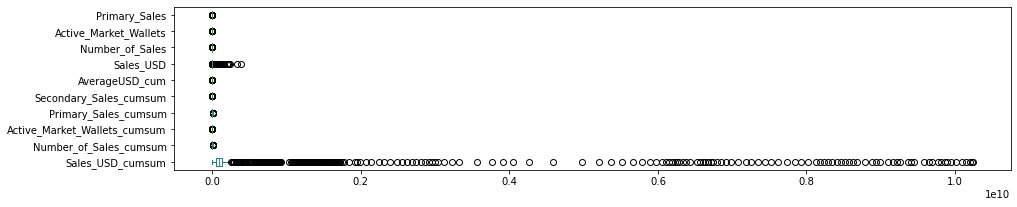

In [130]:
df_nft.plot(kind='box', vert=False, figsize=(15, 3))

In [48]:
df.isnull().sum()

Date                            0
Sales_USD_cumsum                0
Number_of_Sales_cumsum          0
Active_Market_Wallets_cumsum    0
Primary_Sales_cumsum            0
Secondary_Sales_cumsum          0
AverageUSD_cum                  0
Sales_USD                       0
Number_of_Sales                 0
Active_Market_Wallets           0
Primary_Sales                   0
ano                             0
mês                             0
dia                             0
dtype: int64

In [148]:


 cols=["Sales_USD_cumsum","Number_of_Sales_cumsum","Active_Market_Wallets_cumsum","Primary_Sales_cumsum","Secondary_Sales_cumsum","AverageUSD_cum","Sales_USD","Number_of_Sales","Active_Market_Wallets","Primary_Sales"]
 Q1 = df_nft[cols].quantile(0.25)
 Q3 = df_nft[cols].quantile(0.75)
 IQR = Q3 - Q1

 df = df_nft[~((df_nft[cols] < (Q1 - 1.5 * IQR)) |(df_nft[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    

In [154]:
df['Date'] = pd.to_datetime(df_nft['Date'])
df['ano'] = df['Date'].dt.year
df['mês'] = df['Date'].dt.month
df['dia'] = df['Date'].dt.day_name()
df.head(10)

C:\Users\rafac\AppData\Local\Temp/ipykernel_18856/2653561866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df_nft['Date'])
C:\Users\rafac\AppData\Local\Temp/ipykernel_18856/2653561866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ano'] = df['Date'].dt.year
C:\Users\rafac\AppData\Local\Temp/ipykernel_18856/2653561866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales,ano,mês,dia
0,2017-06-22,0.00,0,0.0,0,0.0,0.00,0.00,0.0,502.875391,0.0,2017,6,Thursday
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.000000,0.0,2017,6,Friday
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.000000,0.0,2017,6,Saturday
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.000000,0.0,2017,6,Sunday
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.000000,0.0,2017,6,Monday
5,2017-06-27,5296.23,100,44.0,0,33.0,52.96,2092.91,33.0,10.000000,0.0,2017,6,Tuesday
6,2017-06-28,6543.49,115,46.0,0,15.0,56.90,1247.26,15.0,2.000000,0.0,2017,6,Wednesday
7,2017-06-29,8729.21,153,49.0,0,38.0,57.05,2185.72,38.0,3.000000,0.0,2017,6,Thursday
8,2017-06-30,10437.36,174,53.0,0,21.0,59.98,1708.15,21.0,4.000000,0.0,2017,6,Friday
9,2017-07-01,13578.16,184,55.0,0,10.0,73.79,3140.80,10.0,2.000000,0.0,2017,7,Saturday


<AxesSubplot:>

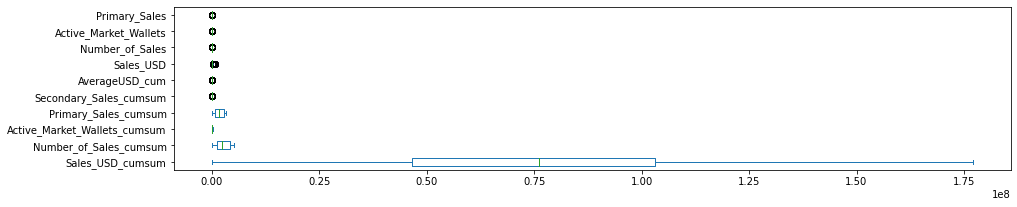

In [144]:
df.plot(kind='box', vert=False, figsize=(15, 3))   

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          1606 non-null   datetime64[ns]
 1   Sales_USD_cumsum              1606 non-null   float64       
 2   Number_of_Sales_cumsum        1606 non-null   int64         
 3   Active_Market_Wallets_cumsum  1606 non-null   float64       
 4   Primary_Sales_cumsum          1606 non-null   int64         
 5   Secondary_Sales_cumsum        1606 non-null   float64       
 6   AverageUSD_cum                1606 non-null   float64       
 7   Sales_USD                     1606 non-null   float64       
 8   Number_of_Sales               1606 non-null   float64       
 9   Active_Market_Wallets         1606 non-null   float64       
 10  Primary_Sales                 1606 non-null   float64       
 11  ano                           

In [4]:
df.shape

(1606, 11)

In [32]:
print (df.dtypes)

Date                            datetime64[ns]
Sales_USD_cumsum                       float64
Number_of_Sales_cumsum                   int64
Active_Market_Wallets_cumsum           float64
Primary_Sales_cumsum                     int64
Secondary_Sales_cumsum                 float64
AverageUSD_cum                         float64
Sales_USD                              float64
Number_of_Sales                        float64
Active_Market_Wallets                  float64
Primary_Sales                          float64
ano                                      int64
mês                                      int64
dia                                     object
dtype: object


## Exploração e visualização dos dados.

Feito o tratamento e a limpeza, podemos então usar a biblioteca Seaborn e plotly para visualizar o comportamento dos dados de forma gráfica, a função pairplot() é exelente ao gerar diversos gráficos ao mesmo tempo. Também usamos a função barplot() para visualizar o comportamento dos valores com o passar dos anos.

<Figure size 2160x864 with 0 Axes>

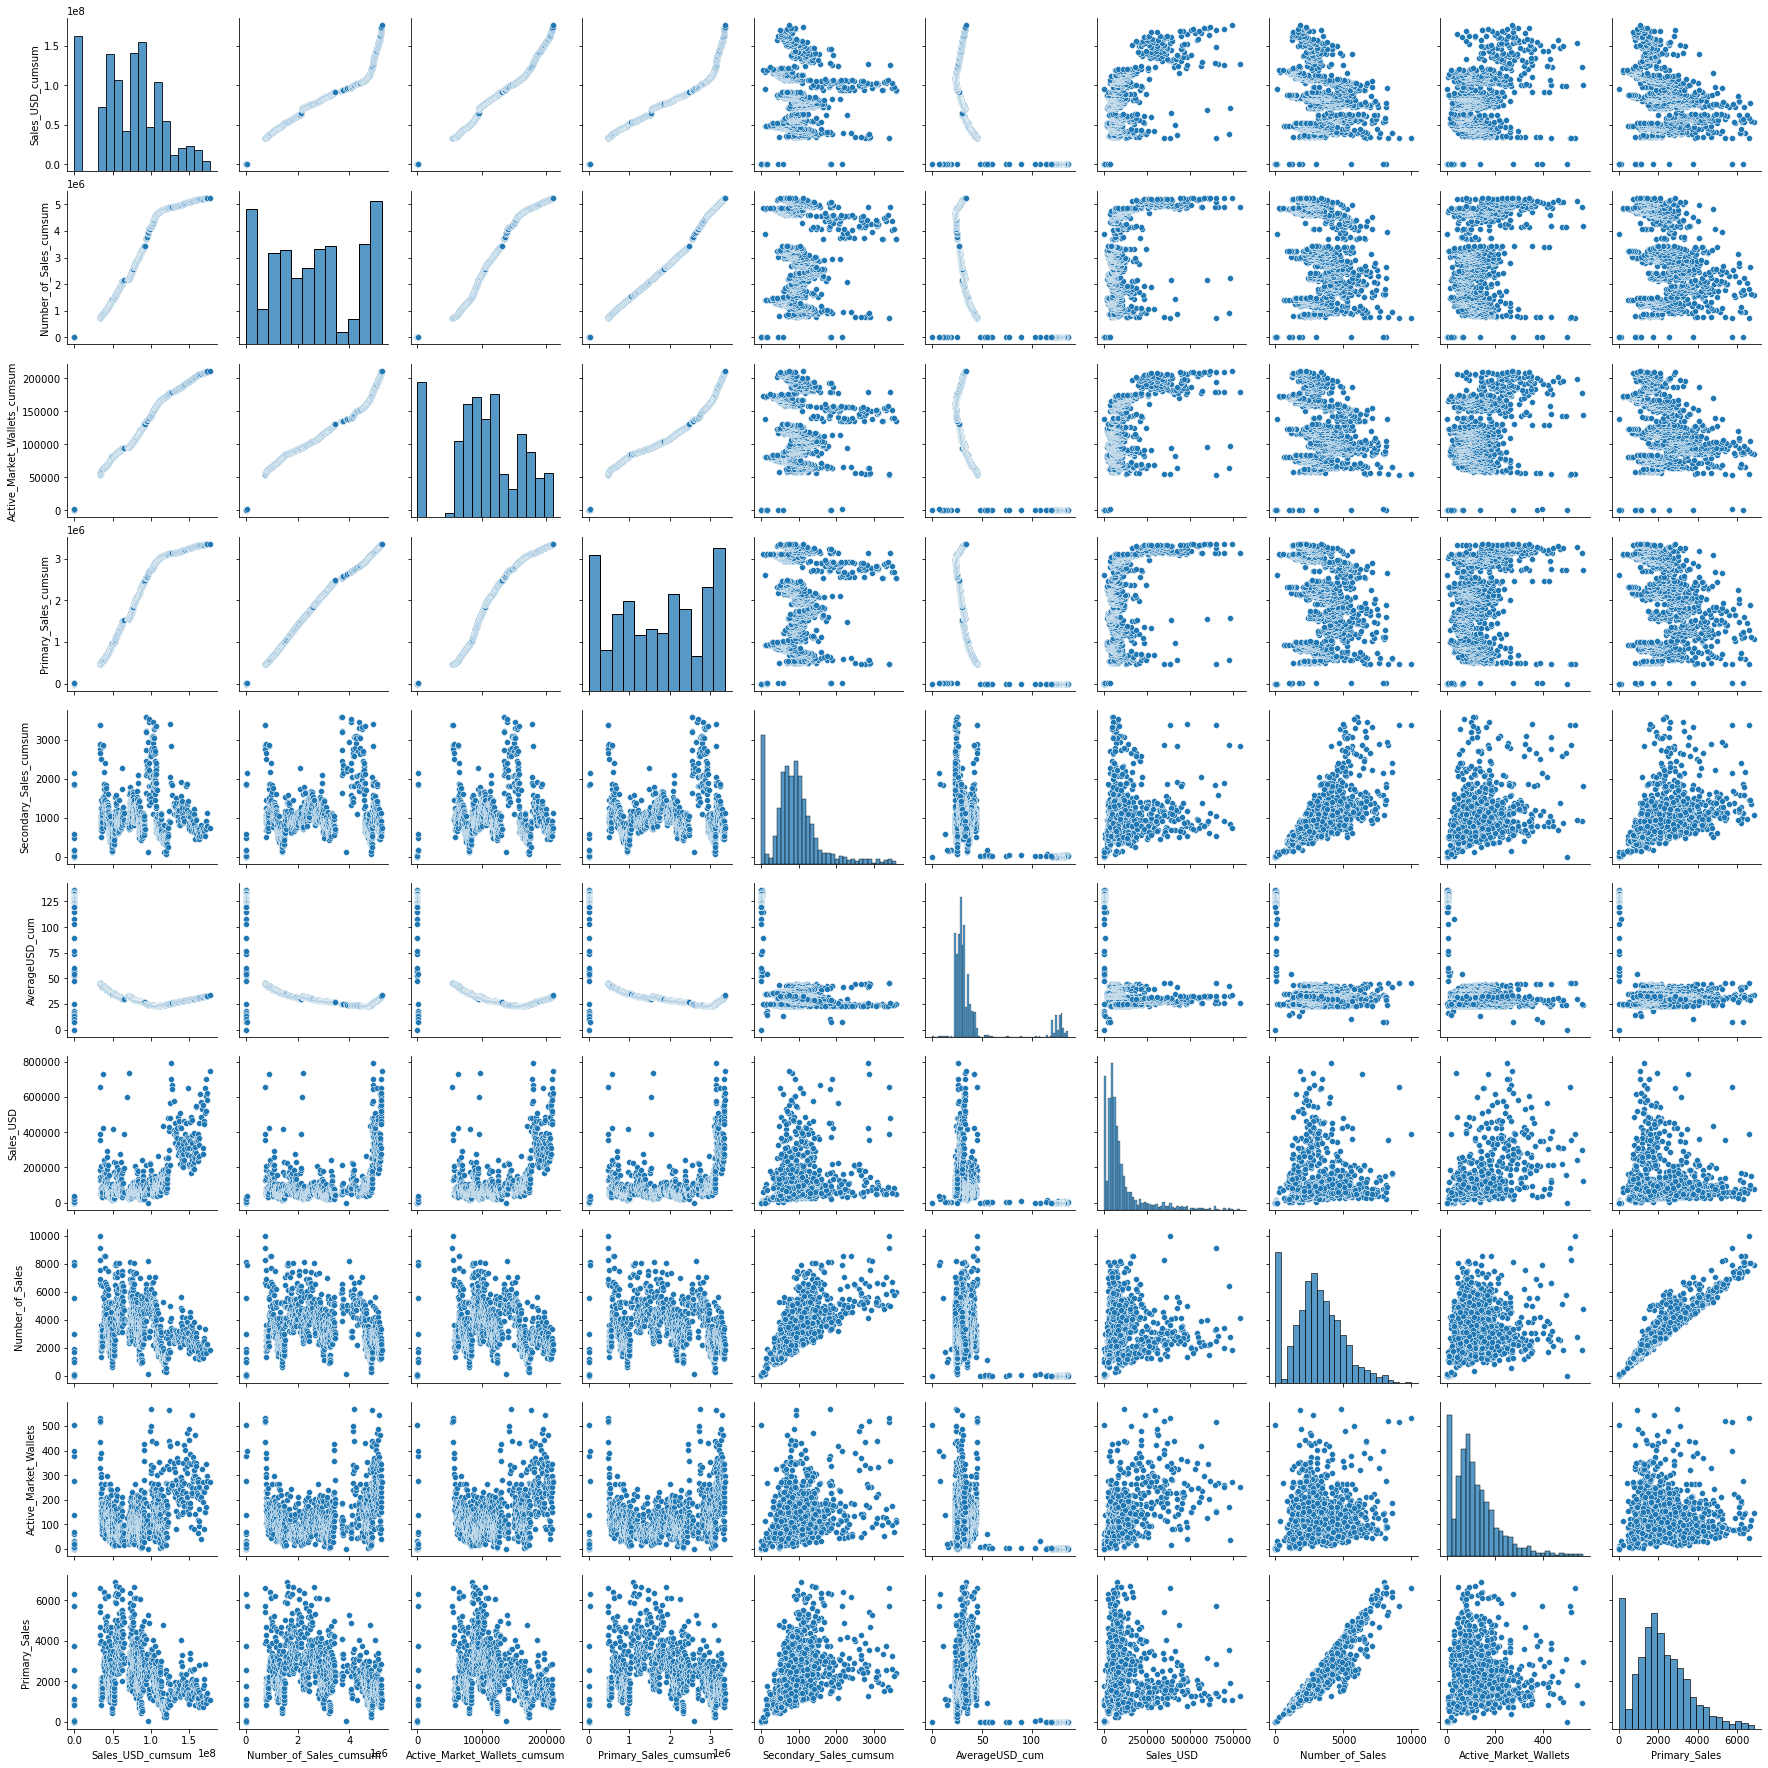

In [153]:
plt.figure(figsize=(30,12))
sns.pairplot(df)

In [ ]:
plt.plot()

<AxesSubplot:xlabel='ano', ylabel='Primary_Sales'>

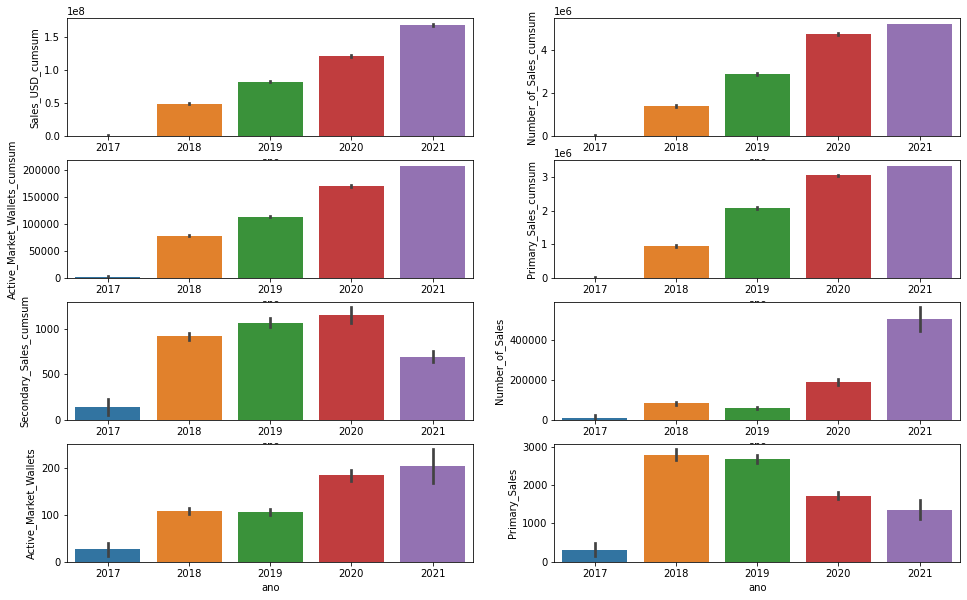

In [155]:
fig, ax = plt.subplots(4,2,figsize=(16,10))


sns.barplot(ax=ax[0][0],x=df['ano'],y=df['Sales_USD_cumsum'])
sns.barplot(ax=ax[0][1],x=df['ano'],y=df['Number_of_Sales_cumsum'])
sns.barplot(ax=ax[1][0],x=df['ano'],y=df['Active_Market_Wallets_cumsum'])
sns.barplot(ax=ax[1][1],x=df['ano'],y=df['Primary_Sales_cumsum'])
sns.barplot(ax=ax[2][0],x=df['ano'],y=df['Secondary_Sales_cumsum'])
sns.barplot(ax=ax[2][1],x=df['ano'],y=df['AverageUSD_cum'])
sns.barplot(ax=ax[2][1],x=df['ano'],y=df['Sales_USD'])
sns.barplot(ax=ax[2][1],x=df['ano'],y=df['Number_of_Sales'])
sns.barplot(ax=ax[3][0],x=df['ano'],y=df['Active_Market_Wallets'])
sns.barplot(ax=ax[3][1],x=df['ano'],y=df['Primary_Sales'])

## Machine Learning

Usando algorítimos de aprendizagem de máquina, podemos então, testar diversas abordagems para averiguar qual o melhor modelo encontrado, para isso, ultilizaremos a métrica do score R2,esta sendo  uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. O R2 varia entre 0 e 1,quanto mais próximo de 1, melhor o modelo.

Os algorítimos testados são:

-LinearRegression()
-RandomForestRegressor
-KNeighborsRegressor



###  Usando LinearRegression()

In [149]:
X=df.drop(['Number_of_Sales_cumsum','Date','ano','mês','dia'], axis=1)
y=df["Number_of_Sales_cumsum"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("O score R2 é:",metrics.r2_score(y_test,y_pred))

O score R2 é: 0.9967080803824138


### Usando RandomForestRegressor()

In [151]:
X=df.drop(['Number_of_Sales_cumsum','Date'], axis=1)
y=df["Number_of_Sales_cumsum"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.20, random_state=0)

regr_2 = RandomForestRegressor(max_depth=2, random_state=0)
regr_2.fit(X_train, y_train)
y_pred_2=regr_2.predict(X_test)
print("O score R2 é:",metrics.r2_score(y_test_2,y_pred_2))



O score R2 é: 0.9575401142100519


### Usando KNeighborsRegressor()

In [152]:
from sklearn.neighbors import KNeighborsRegressor

X=df.drop(['Number_of_Sales_cumsum','Date'], axis=1)
y=df["Number_of_Sales_cumsum"]
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.20, random_state=0)

regr_3 = KNeighborsRegressor(n_neighbors=2)
regr_3.fit(X_train_3, y_train_3)
y_pred_3=regr_3.predict(X_test_3)
print("O score R2 é:",metrics.r2_score(y_test_3,y_pred_3))

O score R2 é: 0.999987535181476


### Conclusão.

Avaliando a partir da R2 score, podemos ver que o melhor modelo de previsão do número de vendas de nft's nos usa é o modelo regr_3, o que utiliza a função KNeighborsRegressor() cpm um score de 0.999987535181476.Este tendo a melhor score para prever o movimento das vendas de NFT's no mercado americano.